In [21]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [22]:
def read_file (filename):
    
    results = []
    
    with open(filename, 'r') as file:
        for line in file:
            data = line.strip().split()
            N = int(data[0])
            model = int(data[1])
            kin = float(data[2])
            kout = float(data[3])
            win = float(data[4])
            wout = float(data[5])
            lamb = float(data[6])
            P = float(data[7])
            err = float(data[8])
            iteration = int(data[9])
            
            results.append([N, model, kin, kout, win, wout, lamb, P, err, iteration])
            
    return results


##########################


def compute_average_weighted (results):
    
    data_points_y = {}
    data_points_z = {}
    data_points_x = {}
    
    for r in results:
        win = r[4]
        wout = r[5]
        kin = float(r[2])
        kout = float(r[3])
        delta_k = kin-kout
        if delta_k not in data_points_y:
#             print (delta_k)
            data_points_y[delta_k] = []
            data_points_z[delta_k] = []
        data_points_y[delta_k].append(r[6])
        data_points_z[delta_k].append(r[7])
       
        
#     print (data_points_y.keys())
    
    x, y, z = [], [], []
    for delta in data_points_y:
        x.append(delta)
        y.append(np.mean(data_points_y[delta]))
        z.append(np.mean(data_points_z[delta]))
    
    return x, y, z


#######################################

def compute_average_weighted_w (results):
    
    data_points_y = {}
    data_points_z = {}
    data_points_x = {}
    
    for r in results:
        win = r[4]
        wout = r[5]
        kin = float(r[4])
        kout = float(r[5])
        delta_k = kin-kout
        if delta_k not in data_points_y:
#             print (delta_k)
            data_points_y[delta_k] = []
            data_points_z[delta_k] = []
        data_points_y[delta_k].append(r[6])
        data_points_z[delta_k].append(r[7])
       
        
#     print (data_points_y.keys())
    
    x, y, z = [], [], []
    for delta in data_points_y:
        x.append(delta)
        y.append(np.mean(data_points_y[delta]))
        z.append(np.mean(data_points_z[delta]))
    
    return x, y, z

In [23]:
# #poisson
# def poisson_threshold (Omega, K):
#     return np.sqrt( K*(Omega+2.) / Omega)


# #exponential
# def exponential_threshold (Omega, K):
#     return np.sqrt(2.0 * K)


# #dirac
# def dirac_threshold (Omega, K):
#     return np.sqrt(K)

# #geometric
# def geometric_threshold (Omega, K):
#     return np.sqrt(2.0*K*(Omega-1.0)/Omega)


def general_threshold (Omega, K, alpha):
    C = 4.0*alpha[0] + 2.0*Omega*alpha[1]+Omega*Omega*alpha[2]
    return np.sqrt(K*C)/Omega

#################


def poisson_threshold (Omega, K):
    alpha = [0,1,1]
    return general_threshold (Omega, K, alpha)

def exponential_threshold (Omega, K):
    alpha = [0,0,2]
    return general_threshold (Omega, K, alpha)

def dirac_threshold (Omega, K):
    alpha = [0,0,1]
    return general_threshold (Omega, K, alpha)

def geometric_threshold (Omega, K):
    alpha = [0,-1,2]
    return general_threshold (Omega, K, alpha)

def sign_threshold (Omega, K):
    alpha = [1,0,0]
    return general_threshold (Omega, K, alpha)

In [24]:
def general_expression (Omega, K, Delta_k, alpha):
    C = 4.0*alpha[0] + 2.0*Omega*alpha[1] + Omega*Omega*alpha[2]    
    return 0.5*Delta_k*Omega + 0.5*K*C/Omega/Delta_k
##############################################################

def dirac_function (Omega, K, Delta_k):
    alpha = [0,0,1]
    return general_expression (Omega, K, Delta_k, alpha)

def poisson_function (Omega, K, Delta_k):
    alpha = [0,1,1]
    return general_expression (Omega, K, Delta_k, alpha)

def exponential_function (Omega, K, Delta_k):
    alpha = [0,0,2]
    return general_expression (Omega, K, Delta_k, alpha)

def geometric_function (Omega, K, Delta_k):
    alpha = [0,-1,2]
    return general_expression (Omega, K, Delta_k, alpha)

def sign_function (Omega, K, Delta_k):
    alpha = [1,0,0]
    return general_expression (Omega, K, Delta_k, alpha)


# def dirac_function (Omega, K, Delta_k):
#     return 0.5*Omega * (Delta_k + K / Delta_k )

# def exponential_function (Omega, K, Delta_k):
#     return 0.5*Omega* ( Delta_k + 2.0 * K / Delta_k )

# def poisson_function (Omega, K, Delta_k):
#     return 0.5*Omega* (Delta_k + K / Delta_k ) + K / Delta_k



In [25]:
# #poisson
# def poisson_threshold_w (Omega, K):
#     return np.sqrt( Omega*(Omega+2.0)/(K+1))


#exponential
# def exponential_threshold_w (Omega, K):
#     return Omega * np.sqrt(2.0/(K+1))


# #dirac
# def dirac_threshold_w (Omega, K):
#     return Omega / np.sqrt(K+1)


def general_threshold_w (Omega, K, alpha):
    C = 4.0*alpha[0] + 2.0*Omega*alpha[1]+Omega*Omega*alpha[2]
    return np.sqrt(C/(K+alpha[2]))


def poisson_threshold_w (Omega, K):
    alpha = [0,1,1]
    return general_threshold_w (Omega, K, alpha)

def exponential_threshold_w (Omega, K):
    alpha = [0,0,2]
    return general_threshold_w (Omega, K, alpha)

def dirac_threshold_w (Omega, K):
    alpha = [0,0,1]
    return general_threshold_w (Omega, K, alpha)

def geometric_threshold_w (Omega, K):
    alpha = [0,-1,2]
    return general_threshold_w (Omega, K, alpha)

def sign_threshold_w (Omega, K):
    alpha = [1,0,0]
    return general_threshold_w (Omega, K, alpha)

In [26]:
def general_expression_w (Omega, K, Delta_o, alpha):
    C = 4.0*alpha[0] + 2.0*Omega*alpha[1]+Omega*Omega*alpha[2]    
    return 0.5*Delta_o*(K+alpha[2])+0.5*C/Delta_o
###########################################

def dirac_function_w (Omega, K, Delta_o):
    alpha = [0,0,1]
    return general_expression_w (Omega, K, Delta_o, alpha)

def poisson_function_w (Omega, K, Delta_o):
    alpha = [0,1,1]
    return general_expression_w (Omega, K, Delta_o, alpha)

def exponential_function_w (Omega, K, Delta_o):
    alpha = [0,0,2]
    return general_expression_w (Omega, K, Delta_o, alpha)

def geometric_function_w (Omega, K, Delta_o):
    alpha = [0,-1,2]
    return general_expression_w (Omega, K, Delta_o, alpha)

def sign_function_w (Omega, K, Delta_o):
    alpha = [1,0,0]
    return general_expression_w (Omega, K, Delta_o, alpha)


# def dirac_function_w (Omega, K, Delta_o):
#     return 0.5 * ((K+1) * Delta_o + Omega*Omega/Delta_o)

# def exponential_function_w (Omega, K, Delta_o):
#     return 0.5 * ((K+1) * Delta_o + 2.0 * Omega*Omega/Delta_o)

# def poisson_function_w (Omega, K, Delta_o):
#     return 0.5 * ((K+1) * Delta_o + Omega*(Omega+2)/Delta_o)

In [27]:
# figure 1

/tmp/ipykernel_141264/1376689502.py:22: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(K*C)/Omega
/tmp/ipykernel_141264/1376689502.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(K*C)/Omega


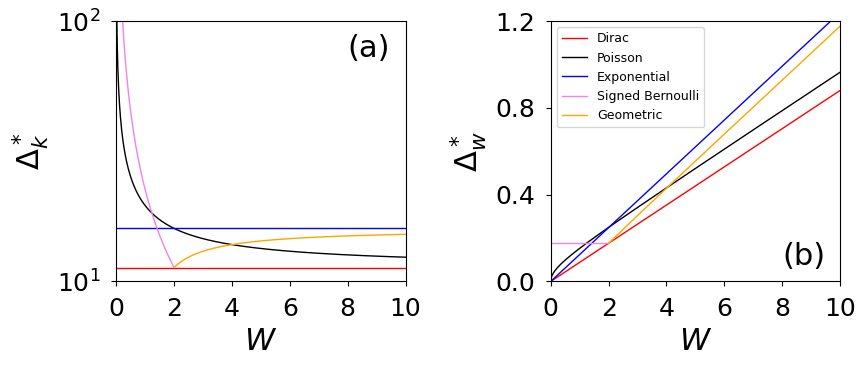

In [31]:
N = 1024
K = 128.0



##########################
fig = plt.figure()
fig.set_size_inches(9,4)
plt.rc('text', usetex=False)
plt.rc('font', size=18, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8




###########################################
ax1 = fig.add_subplot(1,2,1)




o, p, e, d, g, s, os, og = [], [], [], [], [], [], [], []


#omega_vec = np.logspace(0, 3, 1000)
omega_vec = np.linspace(0,10, 1000)
for Omega in omega_vec:
    o.append(Omega)
    d.append(dirac_threshold (Omega, K))
    p.append(poisson_threshold (Omega, K))
    e.append(exponential_threshold (Omega, K))
    if Omega <= 2.0:
        os.append(Omega)
        s.append(sign_threshold (Omega, K))
    if Omega >= 2.0:
        og.append(Omega)
        g.append(geometric_threshold (Omega, K))
   


ax1.plot(o, d, marker = 's', markersize = 0, color = 'red', linewidth = 1, alpha = 1.0, label = 'Dirac', markeredgecolor='none')
ax1.plot(o, p, marker = 'o', markersize = 0, color = 'black', linewidth = 1, alpha = 1.0, label = 'Poisson', markeredgecolor='none')
ax1.plot(o, e, marker = 'v', markersize = 0, color = 'blue', linewidth = 1, alpha = 1.0, label = 'Exponential', markeredgecolor='none')
ax1.plot(os, s, marker = 'v', markersize = 0, color = 'violet', linewidth = 1, alpha = 1.0, label = 'Signed Bernoulli', markeredgecolor='none')
ax1.plot(og, g, marker = 'v', markersize = 0, color = 'orange', linewidth = 1, alpha = 1.0, label = 'Geometric', markeredgecolor='none')


# plt.axvline(x=64, color = 'gray', linestyle = 'dotted')
# plt.axvline(x=256, color = 'gray', linestyle = 'dotted')



########################

# ax1.set_ylim(0, 40)
# ax1.set_xlim(0, 256)
# ax1.set_xticks([0, 100, 200])


# ax1.set_ylim(0, 60)
# ax1.set_xlim(0, 400)
# ax1.set_xticks([0, 200,  400])


# ax1.set_xlabel('$\\omega_{in} + \\omega_{out}$')
# ax1.set_ylabel('$(\\omega_{in} - \\omega_{out})_*$')


ax1.set_xlabel('$W$', size = 22)
ax1.set_ylabel('$\\Delta_k^*$', size = 22)
# ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_xlim(0, 10)
ax1.set_xticks([0, 2, 4, 6, 8, 10])
ax1.set_ylim(1e1, 1e2)
ax1.set_yticks([1e1, 1e2])
ax1.minorticks_off()
# ax1.set_ylim(0, 256)






# ###########################################
ax2 = fig.add_subplot(1,2,2)





o, p, e, d, g, s, os, og = [], [], [], [], [], [], [], []


omega_vec = np.linspace(0,10, 1000)
for Omega in omega_vec:
    o.append(Omega)
    d.append(dirac_threshold_w (Omega, K))
    p.append(poisson_threshold_w (Omega, K))
    e.append(exponential_threshold_w (Omega, K))
    if Omega >= 2.0:
        og.append(Omega)
        g.append(geometric_threshold_w (Omega, K))
    if Omega <= 2.0:
        os.append(Omega)
        s.append(sign_threshold_w (Omega, K))
   


ax2.plot(o, d, marker = 's', markersize = 0, color = 'red', linewidth = 1, alpha = 1.0, label = 'Dirac', markeredgecolor='none')
ax2.plot(o, p, marker = 'o', markersize = 0, color = 'black', linewidth = 1, alpha = 1.0, label = 'Poisson', markeredgecolor='none')
ax2.plot(o, e, marker = 'v', markersize = 0, color = 'blue', linewidth = 1, alpha = 1.0, label = 'Exponential', markeredgecolor='none')
ax2.plot(os, s, marker = 'v', markersize = 0, color = 'violet', linewidth = 1, alpha = 1.0, label = 'Signed Bernoulli', markeredgecolor='none')
ax2.plot(og, g, marker = 'v', markersize = 0, color = 'orange', linewidth = 1, alpha = 1.0, label = 'Geometric', markeredgecolor='none')


# plt.axvline(x=64, color = 'gray', linestyle = 'dotted')
# plt.axvline(x=256, color = 'gray', linestyle = 'dotted')



########################

ax2.set_xlim(0, 10)
ax2.set_xticks([0, 2, 4, 6, 8, 10])

ax2.set_ylim(0, 1.2)
ax2.set_yticks([0, .4, .8, 1.2])



ax2.set_xlabel('$W$', size = 22)
ax2.set_ylabel('$\\Delta_w^*$', size = 22)
ax2.minorticks_off()



###########################3










ax1.text(0.8, 0.95, '(a)', transform=ax1.transAxes, fontsize=22,  va='top')
ax2.text(0.8, 0.15, '(b)', transform=ax2.transAxes, fontsize=22,  va='top')


ax2.legend(loc = 'upper left', fontsize = 9)


# # ax1.axvline(x = 128, color = 'blue', linestyle = 'dotted', linewidth = 1)
# # ax2.axvline(x = 128, color = 'blue', linestyle = 'dotted', linewidth = 1)

fig.tight_layout()


# ax1.axvline(x=2)

plt.savefig('figure1.pdf')

plt.show()

In [29]:
def add_to_panels (ax1, ax2, Omega, K, N, folder):
    
    
   

    filename = folder + 'data_poi_'+str(Omega)+'.dat'
    results_poi = read_file (filename)


    filename = folder + 'data_id_'+str(Omega)+'.dat'
    results_id = read_file (filename)


    filename = folder + 'data_exp_'+str(Omega)+'.dat'
    results_exp = read_file (filename)
    
    
    
    #####################################
    x, y, z = compute_average_weighted (results_id)


    ax1.plot(x, y, marker = 's', markersize = 5, color = 'red', linewidth = 0, alpha = 0.5, label = 'Dirac', markeredgecolor='none')

    r = np.linspace(0.01, max(x)+5, 1000)
    value = dirac_function (Omega, K, r)
    ax1.plot(r, value, marker = 's', markersize = 0, color = 'red', linewidth = 1)

    value = dirac_threshold (Omega, K) 
    ax1.axvline(x = value, color = 'red', linestyle = 'dotted', linewidth = 1)


    ax2.plot(x, z, marker = 's', markersize = 5, color = 'red', linewidth = 0, alpha = 0.5, label = 'Dirac', markeredgecolor='none')

    value = dirac_threshold (Omega, K) 
    ax2.axvline(x = value, color = 'red', linestyle = 'dotted', linewidth = 1)
    
    
    #####################################
    x, y, z = compute_average_weighted (results_poi)


    ax1.plot(x, y, marker = 'o', markersize = 5, color = 'black', linewidth = 0, alpha = 0.5, label = 'Poisson', markeredgecolor='none')

    r = np.linspace(0.01, max(x)+5, 1000)
    value = poisson_function (Omega, K, r)
    ax1.plot(r, value, marker = 'o', markersize = 0, color = 'black', linewidth = 1)

    value = poisson_threshold (Omega, K) 
    ax1.axvline(x = value, color = 'black', linestyle = 'dotted', linewidth = 1)


    ax2.plot(x, z, marker = 'o', markersize = 5, color = 'black', linewidth = 0, alpha = 0.5, label = 'Poisson', markeredgecolor='none')

    value = poisson_threshold (Omega, K) 
    ax2.axvline(x = value, color = 'black', linestyle = 'dotted', linewidth = 1)





    #####################################
    x, y, z = compute_average_weighted (results_exp)


    ax1.plot(x, y, marker = 'v', markersize = 5, color = 'blue', linewidth = 0, alpha = 0.5, label = 'Exponential', markeredgecolor='none')

    r = np.linspace(0.01, max(x)+5, 1000)
    value = exponential_function (Omega, K, r)
    ax1.plot(r, value, marker = 'v', markersize = 0, color = 'blue', linewidth = 1)

    value = exponential_threshold (Omega, K) 
    ax1.axvline(x = value, color = 'blue', linestyle = 'dotted', linewidth = 1)


    ax2.plot(x, z, marker = 'v', markersize = 5, color = 'blue', linewidth = 0, alpha = 0.5, label = 'Exponential', markeredgecolor='none')

    value = exponential_threshold (Omega, K) 
    ax2.axvline(x = value, color = 'blue', linestyle = 'dotted', linewidth = 1)




    ##################################
    
    
    
    
    
def add_to_panels_sign (ax1, ax2, Omega, K, N, folder):
    
    
   

    filename = folder + 'data_sign_'+str(Omega)+'.dat'
    results_sign = read_file (filename)


 
    
    #####################################
    x, y, z = compute_average_weighted (results_sign)


    ax1.plot(x, y, marker = 'd', markersize = 5, color = 'violet', linewidth = 0, alpha = 0.5, label = 'Signed Bernoulli', markeredgecolor='none')

    r = np.linspace(0.01, max(x)+5, 1000)
    value = sign_function (Omega, K, r)
    ax1.plot(r, value, marker = 'd', markersize = 0, color = 'violet', linewidth = 1)

    value = sign_threshold (Omega, K) 
    ax1.axvline(x = value, color = 'violet', linestyle = 'dotted', linewidth = 1)


    ax2.plot(x, z, marker = 'd', markersize = 5, color = 'violet', linewidth = 0, alpha = 0.5, label = 'Signed Bernoulli', markeredgecolor='none')

    value = sign_threshold (Omega, K) 
    ax2.axvline(x = value, color = 'violet', linestyle = 'dotted', linewidth = 1)
    
    
    ##################################
    
    
    
    
def add_to_panels_geometric (ax1, ax2, Omega, K, N, folder):
    
    
   

    filename = folder + 'data_geom_'+str(Omega)+'.dat'
    results_geom = read_file (filename)


 
    
    #####################################
    x, y, z = compute_average_weighted (results_geom)


    ax1.plot(x, y, marker = 'h', markersize = 5, color = 'orange', linewidth = 0, alpha = 0.5, label = 'Geometric', markeredgecolor='none')

    r = np.linspace(0.01, max(x)+5, 1000)
    value = geometric_function (Omega, K, r)
    ax1.plot(r, value, marker = 'h', markersize = 0, color = 'orange', linewidth = 1)

    value = geometric_threshold (Omega, K) 
    ax1.axvline(x = value, color = 'orange', linestyle = 'dotted', linewidth = 1)


    ax2.plot(x, z, marker = 'h', markersize = 5, color = 'orange', linewidth = 0, alpha = 0.5, label = 'Geometric', markeredgecolor='none')

    value = geometric_threshold (Omega, K) 
    ax2.axvline(x = value, color = 'orange', linestyle = 'dotted', linewidth = 1)
    
    
    ##################################





In [12]:
Omega = 10.0
K = 128.0
N = 1024



folder = '../Data/UnweightedK64/'


In [13]:
# print (results_poi)

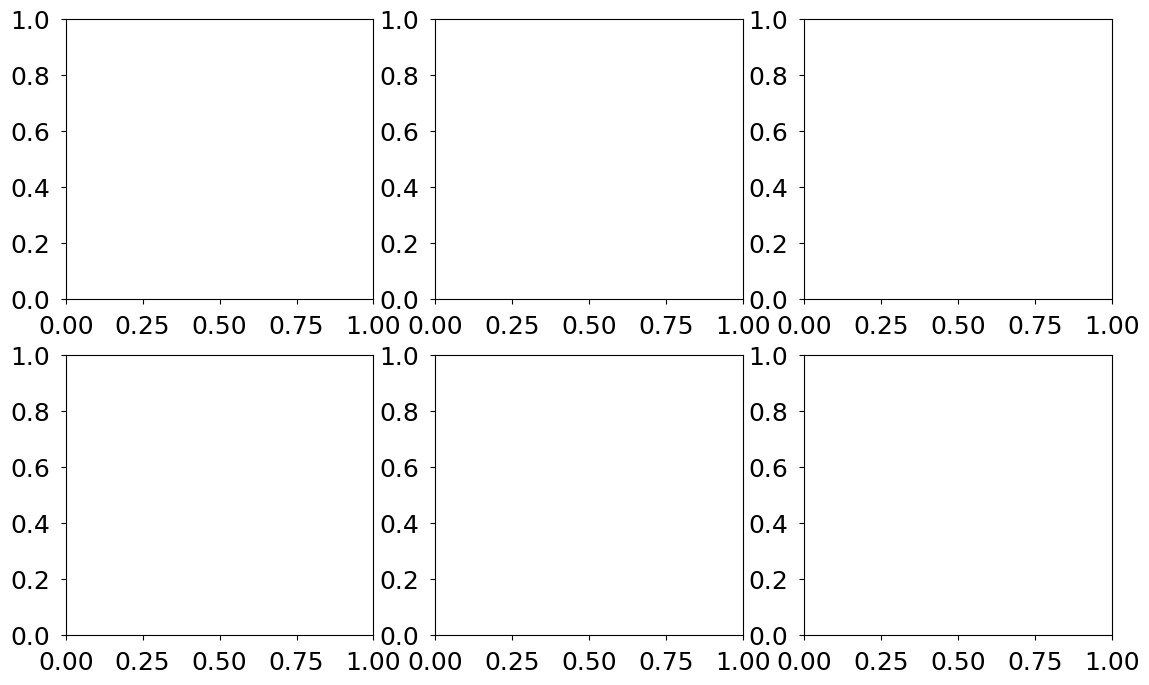

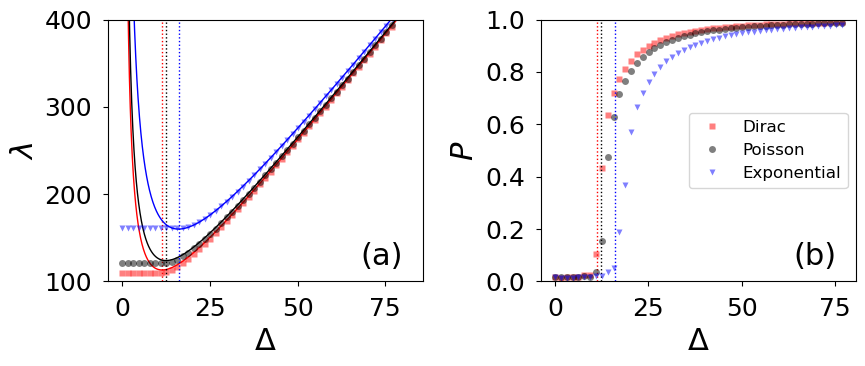

In [14]:
##########################
fig = plt.figure()
fig.set_size_inches(9,4)
plt.rc('text', usetex=False)
plt.rc('font', size=18, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8



###########################################
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)



Omega = 10.0
K = 128.0
N = 1024
folder = '../Data/UnweightedK64/'

add_to_panels (ax1, ax2, Omega, K, N, folder)





##################################

ax1.set_ylim(100, 400)
# ax1.set_xlim(0, 160)
# ax1.set_xticks([0, 40, 80, 120, 160])
# ax1.set_yticks([40, 80, 120, 160])

ax1.set_ylabel('$\\lambda$', size = 22)
ax1.set_xlabel('$\\Delta$', size = 22)
###########################################


ax2.set_ylim(0, 1)
# ax2.set_xlim(0, 160)
# ax2.set_xticks([0, 40, 80, 120, 160])


ax2.set_ylabel('$P$', size = 22)
ax2.set_xlabel('$\\Delta$', size = 22)


##########################################


ax1.text(0.8, 0.15, '(a)', transform=ax1.transAxes, fontsize=22,  va='top')
ax2.text(0.8, 0.15, '(b)', transform=ax2.transAxes, fontsize=22,  va='top')


ax2.legend(loc = 'center right', fontsize = 12)


fig.tight_layout()
# plt.savefig('figure2.pdf')
plt.show()

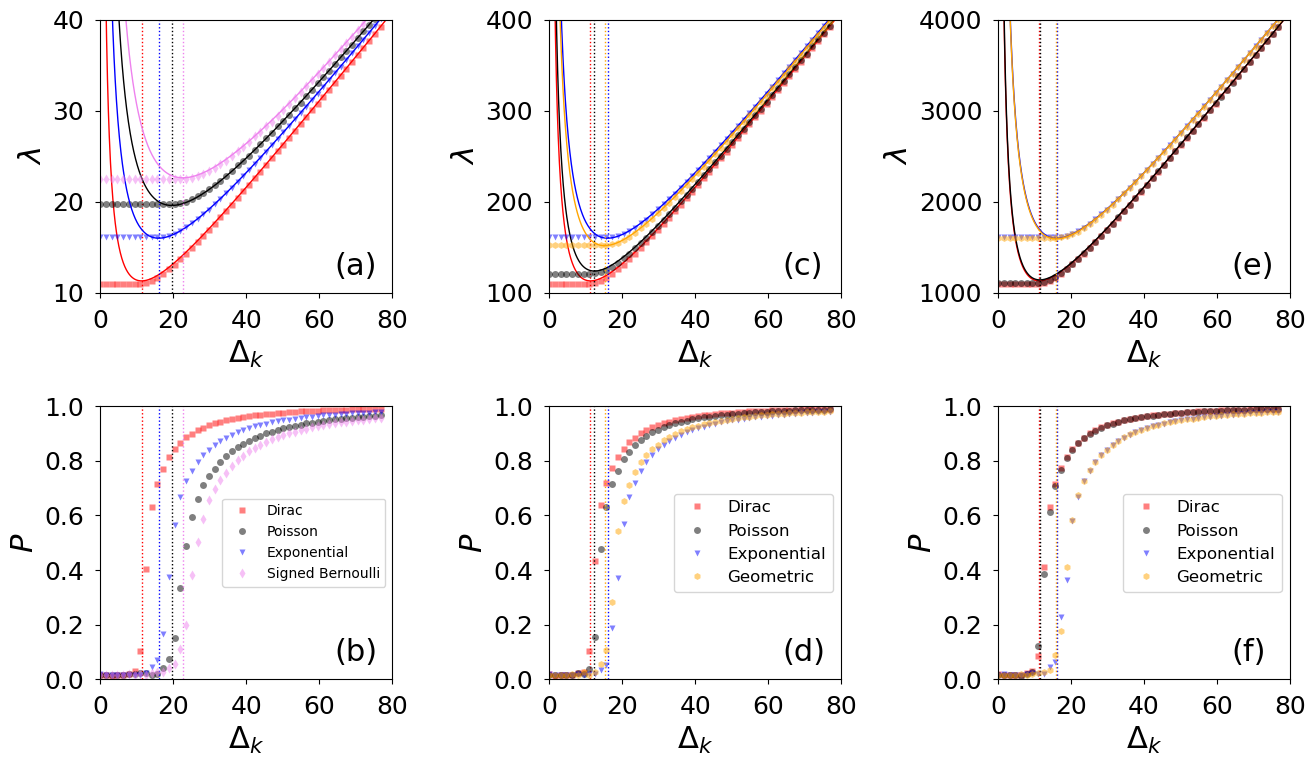

In [16]:
##########################
fig = plt.figure()
fig.set_size_inches(13.5,8)
plt.rc('text', usetex=False)
plt.rc('font', size=18, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8



###########################################
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,4)

ax3 = fig.add_subplot(2,3,2)
ax4 = fig.add_subplot(2,3,5)

ax5 = fig.add_subplot(2,3,3)
ax6 = fig.add_subplot(2,3,6)





Omega = 1.0
K = 128.0
N = 1024
add_to_panels (ax1, ax2, Omega, K, N, folder)
add_to_panels_sign (ax1, ax2, Omega, K, N, folder)

##################################

ax1.set_ylim(10, 40)
ax1.set_xlim(0, 80)
ax1.set_xticks([0, 20, 40, 60, 80])
ax1.set_yticks([10, 20, 30, 40])

ax1.set_ylabel('$\\lambda$', size = 22)
ax1.set_xlabel('$\\Delta_k$', size = 22)
###########################################




ax2.set_ylim(0, 1)
ax2.set_xlim(0, 80)
ax2.set_xticks([0, 20, 40, 60, 80])


ax2.set_ylabel('$P$', size = 22)
ax2.set_xlabel('$\\Delta_k$', size = 22)


##########################################





Omega = 10.0
K = 128.0
N = 1024
add_to_panels (ax3, ax4, Omega, K, N, folder)
add_to_panels_geometric (ax3, ax4, Omega, K, N, folder)

##################################

ax3.set_ylim(100, 400)
ax3.set_xlim(0, 80)
ax3.set_xticks([0, 20, 40, 60, 80])
ax3.set_yticks([100, 200, 300, 400])

ax3.set_ylabel('$\\lambda$', size = 22)
ax3.set_xlabel('$\\Delta_k$', size = 22)
###########################################


ax4.set_ylim(0, 1)
ax4.set_xlim(0, 80)
ax4.set_xticks([0, 20, 40, 60, 80])


ax4.set_ylabel('$P$', size = 22)
ax4.set_xlabel('$\\Delta_k$', size = 22)


##########################################






Omega = 100.0
K = 128.0
N = 1024
add_to_panels (ax5, ax6, Omega, K, N, folder)
add_to_panels_geometric (ax5, ax6, Omega, K, N, folder)

##################################

ax5.set_ylim(1000, 4000)
ax5.set_xlim(0, 80)
ax5.set_xticks([0, 20, 40, 60, 80])
ax5.set_yticks([1000, 2000, 3000, 4000])

ax5.set_ylabel('$\\lambda$', size = 22)
ax5.set_xlabel('$\\Delta_k$', size = 22)
###########################################


ax6.set_ylim(0, 1)
ax6.set_xlim(0, 80)
ax6.set_xticks([0, 20, 40, 60, 80])


ax6.set_ylabel('$P$', size = 22)
ax6.set_xlabel('$\\Delta_k$', size = 22)


##########################################




ax1.text(0.8, 0.15, '(a)', transform=ax1.transAxes, fontsize=22,  va='top')
ax2.text(0.8, 0.15, '(b)', transform=ax2.transAxes, fontsize=22,  va='top')
ax3.text(0.8, 0.15, '(c)', transform=ax3.transAxes, fontsize=22,  va='top')
ax4.text(0.8, 0.15, '(d)', transform=ax4.transAxes, fontsize=22,  va='top')
ax5.text(0.8, 0.15, '(e)', transform=ax5.transAxes, fontsize=22,  va='top')
ax6.text(0.8, 0.15, '(f)', transform=ax6.transAxes, fontsize=22,  va='top')


ax2.legend(loc = 'center right', fontsize = 10)
ax4.legend(loc = 'center right', fontsize = 12)
ax6.legend(loc = 'center right', fontsize = 12)

fig.tight_layout()
plt.savefig('figure2.pdf')
plt.show()

In [90]:
# figure 1

In [17]:
def add_to_panels_w (ax1, ax2, Omega, K, N, folder):
    
    
   

    filename = folder + 'data_poi_'+str(Omega)+'.dat'
    results_poi = read_file (filename)


    filename = folder + 'data_id_'+str(Omega)+'.dat'
    results_id = read_file (filename)


    filename = folder + 'data_exp_'+str(Omega)+'.dat'
    results_exp = read_file (filename)
    
    
    



    #####################################
    x, y, z = compute_average_weighted_w (results_id)


    ax1.plot(x, y, marker = 's', markersize = 5, color = 'red', linewidth = 0, alpha = 0.5, label = 'Dirac', markeredgecolor='none')

    r = np.linspace(0.01, max(x)+5, 1000)
    value = dirac_function_w (Omega, K, r)
    ax1.plot(r, value, marker = 's', markersize = 0, color = 'red', linewidth = 1)

    value = dirac_threshold_w (Omega, K) 
    ax1.axvline(x = value, color = 'red', linestyle = 'dotted', linewidth = 1)


    ax2.plot(x, z, marker = 's', markersize = 5, color = 'red', linewidth = 0, alpha = 0.5, label = 'Dirac', markeredgecolor='none')

    value = dirac_threshold_w (Omega, K) 
    ax2.axvline(x = value, color = 'red', linestyle = 'dotted', linewidth = 1)
    
    
    #####################################
    x, y, z = compute_average_weighted_w (results_poi)


    ax1.plot(x, y, marker = 'o', markersize = 5, color = 'black', linewidth = 0, alpha = 0.5, label = 'Poisson', markeredgecolor='none')

    r = np.linspace(0.01, max(x)+5, 1000)
    value = poisson_function_w (Omega, K, r)
    ax1.plot(r, value, marker = 'o', markersize = 0, color = 'black', linewidth = 1)

    value = poisson_threshold_w (Omega, K) 
    ax1.axvline(x = value, color = 'black', linestyle = 'dotted', linewidth = 1)


    ax2.plot(x, z, marker = 'o', markersize = 5, color = 'black', linewidth = 0, alpha = 0.5, label = 'Poisson', markeredgecolor='none')

    value = poisson_threshold_w (Omega, K) 
    ax2.axvline(x = value, color = 'black', linestyle = 'dotted', linewidth = 1)


    #####################################
    x, y, z = compute_average_weighted_w (results_exp)


    ax1.plot(x, y, marker = 'v', markersize = 5, color = 'blue', linewidth = 0, alpha = 0.5, label = 'Exponential', markeredgecolor='none')

    r = np.linspace(0.01, max(x)+5, 1000)
    value = exponential_function_w (Omega, K, r)
    ax1.plot(r, value, marker = 'v', markersize = 0, color = 'blue', linewidth = 1)

    value = exponential_threshold_w (Omega, K) 
    ax1.axvline(x = value, color = 'blue', linestyle = 'dotted', linewidth = 1)


    ax2.plot(x, z, marker = 'v', markersize = 5, color = 'blue', linewidth = 0, alpha = 0.5, label = 'Exponential', markeredgecolor='none')

    value = exponential_threshold_w (Omega, K) 
    ax2.axvline(x = value, color = 'blue', linestyle = 'dotted', linewidth = 1)




    ##################################
    
    
    
def add_to_panels_sign_w (ax1, ax2, Omega, K, N, folder):
    
    
   

    filename = folder + 'data_sign_'+str(Omega)+'.dat'
    results_sign = read_file (filename)


 
    
    #####################################
    x, y, z = compute_average_weighted_w (results_sign)


    ax1.plot(x, y, marker = 'd', markersize = 5, color = 'violet', linewidth = 0, alpha = 0.5, label = 'Signed Bernoulli', markeredgecolor='none')

    r = np.linspace(0.01, max(x)+5, 1000)
    value = sign_function_w (Omega, K, r)
    ax1.plot(r, value, marker = 'd', markersize = 0, color = 'violet', linewidth = 1)

    value = sign_threshold_w (Omega, K) 
    ax1.axvline(x = value, color = 'violet', linestyle = 'dotted', linewidth = 1)


    ax2.plot(x, z, marker = 'd', markersize = 5, color = 'violet', linewidth = 0, alpha = 0.5, label = 'Signed Bernoulli', markeredgecolor='none')

    value = sign_threshold_w (Omega, K) 
    ax2.axvline(x = value, color = 'violet', linestyle = 'dotted', linewidth = 1)
    
    
    ##################################
    
    
    
    
def add_to_panels_geometric_w (ax1, ax2, Omega, K, N, folder):
    
    
   

    filename = folder + 'data_geom_'+str(Omega)+'.dat'
    results_geom = read_file (filename)


 
    
    #####################################
    x, y, z = compute_average_weighted_w (results_geom)


    ax1.plot(x, y, marker = 'h', markersize = 5, color = 'orange', linewidth = 0, alpha = 0.5, label = 'Geometric', markeredgecolor='none')

    r = np.linspace(0.01, max(x)+5, 1000)
    value = geometric_function_w (Omega, K, r)
    ax1.plot(r, value, marker = 'h', markersize = 0, color = 'orange', linewidth = 1)

    value = geometric_threshold_w (Omega, K) 
    ax1.axvline(x = value, color = 'orange', linestyle = 'dotted', linewidth = 1)


    ax2.plot(x, z, marker = 'h', markersize = 5, color = 'orange', linewidth = 0, alpha = 0.5, label = 'Geometric', markeredgecolor='none')

    value = geometric_threshold_w (Omega, K) 
    ax2.axvline(x = value, color = 'orange', linestyle = 'dotted', linewidth = 1)
    
    
    ##################################





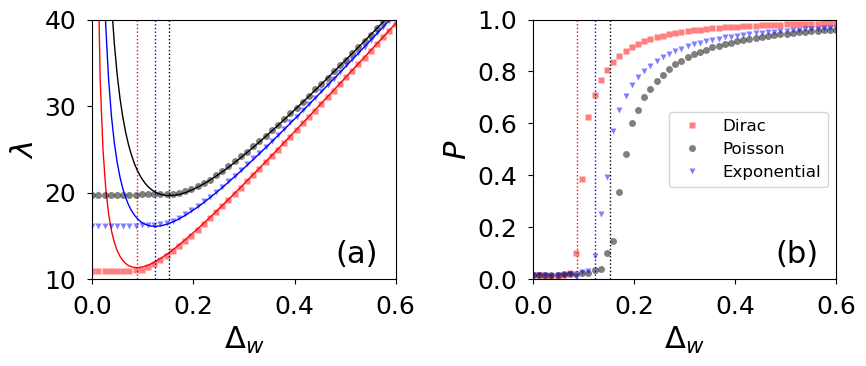

In [18]:
folder = '../Data/K64/'


##########################
fig = plt.figure()
fig.set_size_inches(9,4)
plt.rc('text', usetex=False)
plt.rc('font', size=18, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8



###########################################
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)



Omega = 1.0
K = 128.0
N = 1024
add_to_panels_w (ax1, ax2, Omega, K, N, folder)





##################################

ax1.set_ylim(10, 40)
ax1.set_xlim(0, 0.6)
ax1.set_xticks([0, .2, .4, .6])
ax1.set_yticks([10, 20, 30, 40])

ax1.set_ylabel('$\\lambda$', size = 22)
ax1.set_xlabel('$\\Delta_w$', size = 22)
###########################################


ax2.set_ylim(0, 1)
ax2.set_xlim(0, 0.6)
ax2.set_xticks([0, .2, .4, .6])


ax2.set_ylabel('$P$', size = 22)
ax2.set_xlabel('$\\Delta_w$', size = 22)


##########################################


ax1.text(0.8, 0.15, '(a)', transform=ax1.transAxes, fontsize=22,  va='top')
ax2.text(0.8, 0.15, '(b)', transform=ax2.transAxes, fontsize=22,  va='top')


ax2.legend(loc = 'center right', fontsize = 12)


fig.tight_layout()
# plt.savefig('figure2.pdf')
plt.show()

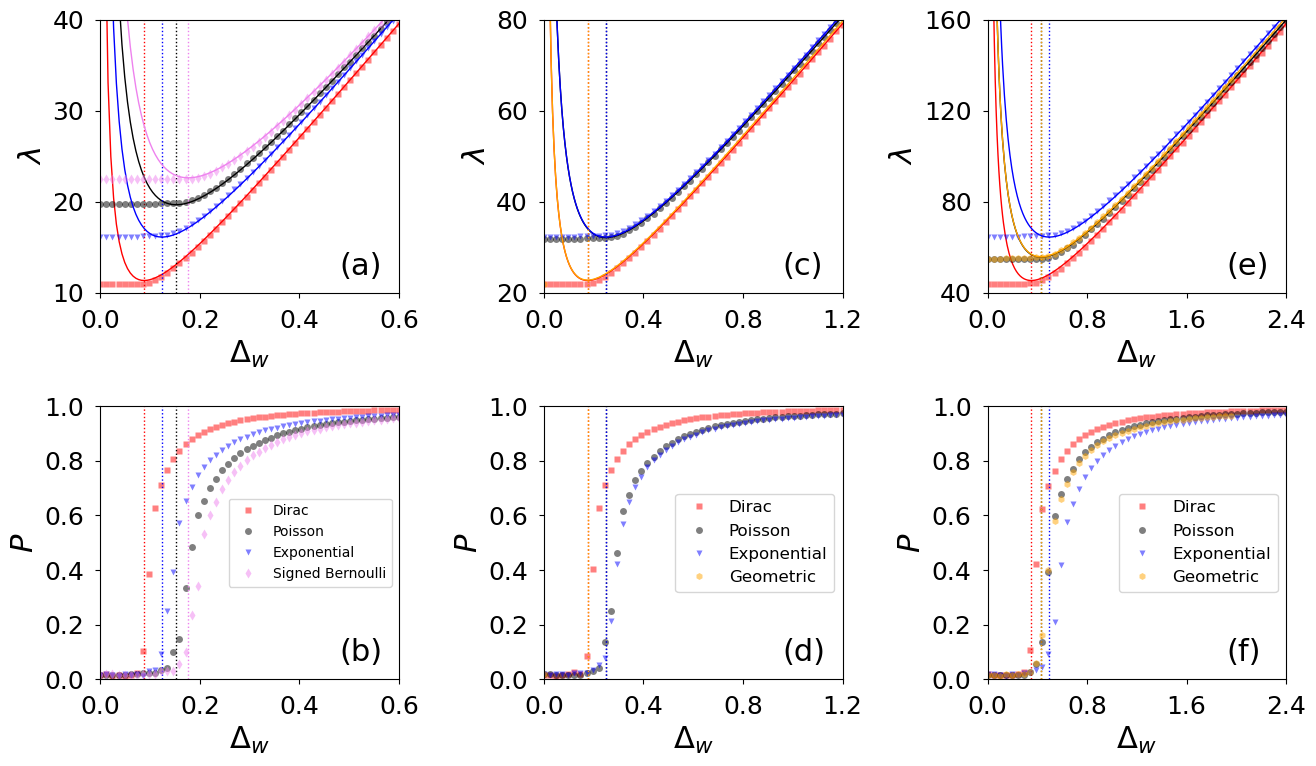

In [20]:
folder = '../Data/K64/'


##########################
fig = plt.figure()
fig.set_size_inches(13.5,8)
plt.rc('text', usetex=False)
plt.rc('font', size=18, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8



###########################################
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,4)

ax3 = fig.add_subplot(2,3,2)
ax4 = fig.add_subplot(2,3,5)

ax5 = fig.add_subplot(2,3,3)
ax6 = fig.add_subplot(2,3,6)





Omega = 1.0
K = 128.0
N = 1024
add_to_panels_w (ax1, ax2, Omega, K, N, folder)
add_to_panels_sign_w (ax1, ax2, Omega, K, N, folder)

##################################

ax1.set_ylim(10, 40)
ax1.set_xlim(0, 0.6)
ax1.set_xticks([0, .2, .4, .6])
ax1.set_yticks([10, 20, 30, 40])

ax1.set_ylabel('$\\lambda$', size = 22)
ax1.set_xlabel('$\\Delta_w$', size = 22)
###########################################


ax2.set_ylim(0, 1)
ax2.set_xlim(0, 0.6)
ax2.set_xticks([0, .2, .4, .6])


ax2.set_ylabel('$P$', size = 22)
ax2.set_xlabel('$\\Delta_w$', size = 22)


##########################################





Omega = 2.0
K = 128.0
N = 1024
add_to_panels_w (ax3, ax4, Omega, K, N, folder)
add_to_panels_geometric_w (ax3, ax4, Omega, K, N, folder)

##################################

ax3.set_ylim(20, 80)
ax3.set_xlim(0, 1.2)
ax3.set_xticks([0, .4, .8, 1.2])
ax3.set_yticks([20, 40, 60, 80])

ax3.set_ylabel('$\\lambda$', size = 22)
ax3.set_xlabel('$\\Delta_w$', size = 22)
###########################################


ax4.set_ylim(0, 1)
ax4.set_xlim(0, 1.2)
ax4.set_xticks([0, .4, .8, 1.2])


ax4.set_ylabel('$P$', size = 22)
ax4.set_xlabel('$\\Delta_w$', size = 22)

##########################################






Omega = 4.0
K = 128.0
N = 1024
add_to_panels_w (ax5, ax6, Omega, K, N, folder)
add_to_panels_geometric_w (ax5, ax6, Omega, K, N, folder)

##################################

ax5.set_ylim(40, 160)
ax5.set_xlim(0, 2.4)
ax5.set_xticks([0, .8, 1.6, 2.4])
ax5.set_yticks([40, 80, 120, 160])

ax5.set_ylabel('$\\lambda$', size = 22)
ax5.set_xlabel('$\\Delta_w$', size = 22)
###########################################


ax6.set_ylim(0, 1)
ax6.set_xlim(0, 2.4)
ax6.set_xticks([0, .8, 1.6, 2.4])


ax6.set_ylabel('$P$', size = 22)
ax6.set_xlabel('$\\Delta_w$', size = 22)

##########################################




ax1.text(0.8, 0.15, '(a)', transform=ax1.transAxes, fontsize=22,  va='top')
ax2.text(0.8, 0.15, '(b)', transform=ax2.transAxes, fontsize=22,  va='top')
ax3.text(0.8, 0.15, '(c)', transform=ax3.transAxes, fontsize=22,  va='top')
ax4.text(0.8, 0.15, '(d)', transform=ax4.transAxes, fontsize=22,  va='top')
ax5.text(0.8, 0.15, '(e)', transform=ax5.transAxes, fontsize=22,  va='top')
ax6.text(0.8, 0.15, '(f)', transform=ax6.transAxes, fontsize=22,  va='top')


ax2.legend(loc = 'center right', fontsize = 10)
ax4.legend(loc = 'center right', fontsize = 12)
ax6.legend(loc = 'center right', fontsize = 12)

fig.tight_layout()
plt.savefig('figure3.pdf')
plt.show()